# Optical example
Let's use EOReader with optical data.
## Imports


In [1]:
import os
from pprint import pformat
import matplotlib.pyplot as plt

# EOReader
from eoreader.reader import Reader
from eoreader.bands import *
from eoreader.env_vars import DEM_PATH

## Open the product

First, we need some satellite data. 
Let's open a lightweight `Landsat-5 TM` collection 2 product.

In [2]:
path = os.path.join("/home", "data", "DATA", "PRODS", "LANDSATS_COL2", "LT05_L1TP_200030_20111110_20200820_02_T1.tar")
reader = Reader()
prod = reader.open(path)
prod

EOReader L5Product
Attributes:
	condensed_name: 20111110T103612_L5_200030_TM
	name: LT05_L1TP_200030_20111110_20200820_02_T1
	path: /home/data/DATA/PRODS/LANDSATS_COL2/LT05_L1TP_200030_20111110_20200820_02_T1.tar
	platform: Landsat-5
	sensor type: Optical
	product type: TM
	default resolution: 30.0
	acquisition datetime: 2011-11-10T10:36:12
	band mapping:
		BLUE: 1
		GREEN: 2
		RED: 3
		NIR: 4
		NARROW_NIR: 4
		SWIR_1: 5
		SWIR_2: 7
		THERMAL_IR_1: 6
		THERMAL_IR_2: 6
	tile name: 200030
	needs_extraction: False

## Product information
You have opened your product, and you have its object in hands
You can play a little with it to see what it is inside

In [3]:
print(
    f"Landsat tile: {prod.tile_name}\n\n"
    f"Acquisition datetime: {prod.datetime}\n\n"
    f"Existing bands:\n{pformat([band.value for band in prod.get_existing_bands()])}"
)

Landsat tile: 200030

Acquisition datetime: 2011-11-10 10:36:12

Existing bands:
['BLUE',
 'GREEN',
 'RED',
 'NIR',
 'NARROW_NIR',
 'SWIR_1',
 'SWIR_2',
 'THERMAL_IR_1',
 'THERMAL_IR_2']


In [4]:
# Retrieve the UTM CRS of the tile
prod.crs()

CRS.from_epsg(32630)

<AxesSubplot:>

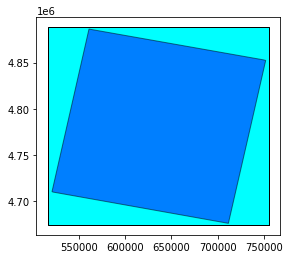

In [5]:
# Open here some more interesting geographical data: extent and footprint
extent = prod.extent()
footprint = prod.footprint()
base = extent.plot(color='cyan', edgecolor='black')
footprint.plot(ax=base, color='blue', edgecolor='black', alpha=0.5)

See the difference between footprint and extent hereunder:

|Without nodata | With nodata|
|--- | ---|
| ![without_nodata](https://zupimages.net/up/21/14/69i6.gif) | ![with_nodata](https://zupimages.net/up/21/14/vg6w.gif) |

## Load bands

Let's open some optical bands, cloud bands and maybe DEM bands.

In [6]:
# Select some bands you want to load
bands = [GREEN, NDVI, YELLOW, CLOUDS]

# Compute DEM band only if you have set a DEM in your environment path
if DEM_PATH in os.environ:
    bands.append(HILLSHADE)

# Be sure they exist for Landsat-5 TM sensor:
ok_bands = [band for band in bands if prod.has_band(band)]
print(to_str(ok_bands))  # Landsat-5 TM doesn't provide YELLOW band

['GREEN', 'NDVI', 'CLOUDS']


In [7]:
# Load those bands as a dict of xarray.DataArray
band_dict = prod.load(ok_bands)
band_dict[GREEN]

<xarray.DataArray 'GREEN' (band: 1, y: 7131, x: 7991)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 5.16e+05 5.16e+05 5.161e+05 ... 7.557e+05 7.557e+05
  * y            (y) float64 4.888e+06 4.888e+06 ... 4.674e+06 4.674e+06
    spatial_ref  int64 0
Attributes:
    cleaning_method:   nodata
    long_name:         GREEN
    sensor:            Landsat-5
    sensor_id:         L5
    product_path:      /home/data/DATA/PRODS/LANDSATS_COL2/LT05_L1TP_200030_2...
    product_name:      LT05_L1TP_200030_20111110_20200820_02_T1
    product_filename:  LT05_L1TP_200030_20111110_20200820_02_T1
    product_type:      TM
    acquisition_date:  20111110T103612
    condensed_name:    20111110T103612_L5_200030_TM
    radiometry:        reflectance

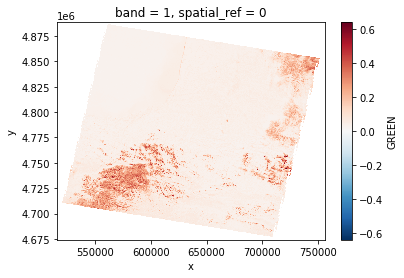

In [8]:
# The nan corresponds to the nodata you see on the footprint
# Plot a subsampled version
band_dict[GREEN][:, ::10, ::10].plot()

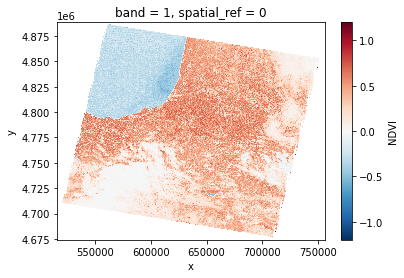

In [9]:
# Plot a subsampled version
band_dict[NDVI][:, ::10, ::10].plot()

In [10]:
# Plot a subsampled version
if HILLSHADE in band_dict:
    band_dict[HILLSHADE][:, ::10, ::10].plot()

## Load a stack
You can also stack the bands you requested right before

In [11]:
# You can also stack those bands
stack = prod.stack(ok_bands)
stack

<xarray.DataArray 'GREEN NDVI CLOUDS' (z: 3, y: 7131, x: 7991)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
    spatial_ref  int64 0
  * x            (x) float64 5.16e+05 5.16e+05 5.161e+05 ... 7.557e+05 7.557e+05
  * y            (y) float64 4.888e+06 4.888e+06 ... 4.674e+06 4.674e+06
  * z            (z) MultiIndex
  - variable     (z) object 'GREEN' 'NDVI' 'CLOUDS'
  - band         (z) int64 1 1 1
Attributes:
    long_name:         GREEN NDVI CLOUDS
    sensor:            Landsat-5
    sensor_id:         L5
    product_path:      /home/data/DATA/PRODS/LANDSATS_COL2/LT05_L1TP_200030_2...
    product_name:      LT05_L1TP_200030_20111110_20200820_02_T1
    product_filename:  LT05_L1TP_200030_20111110_20200820_02_T1
    product_type:      TM
    acquisition_date:  20111110T103612
    condensed_name:    20111110T103612_L5_200030_TM
    radiometry:        reflectance

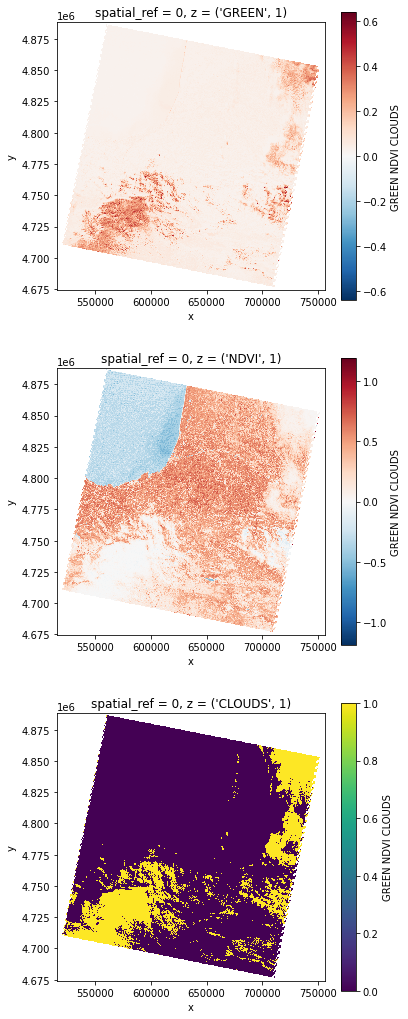

In [12]:
# Plot a subsampled version
nrows = len(stack)
fig, axes = plt.subplots(nrows=nrows, figsize=(2 * nrows, 6 * nrows), subplot_kw={"box_aspect": 1})  # Square plots
for i in range(nrows):
    stack[i, ::10, ::10].plot(x="x", y="y", ax=axes[i])


## Radiometric processing
EOReader allows you to load the band array as provided (either in DN, scaled radiance or reflectance).
However, by default, EOReader converts all optical bands in reflectance (except for the thermal bands that are left if brilliance temperature)

The radiometric processing is described in the band's attribute, either `reflectance` or `as is` 

In [13]:
# Reflectance band
from eoreader.keywords import TO_REFLECTANCE
prod.load(RED, **{TO_REFLECTANCE: True})

{<OpticalBandNames.RED: 'RED'>: <xarray.DataArray 'RED' (band: 1, y: 7131, x: 7991)>
 array([[[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
 Coordinates:
   * band         (band) int64 1
   * x            (x) float64 5.16e+05 5.16e+05 5.161e+05 ... 7.557e+05 7.557e+05
   * y            (y) float64 4.888e+06 4.888e+06 ... 4.674e+06 4.674e+06
     spatial_ref  int64 0
 Attributes:
     scale_factor:      1.0
     add_offset:        0.0
     long_name:         RED
     sensor:            Landsat-5
     sensor_id:         L5
     product_path:      /home/data/DATA/PRODS/LANDSATS_COL2/LT05_L1TP_200030_2...
     product_name:      LT05_L1TP_200030_20111110_20200820_02_T1
     product_filename:  LT05_L1TP_200030_20111110_20200820_02_T1
     prod

In [14]:
# As is band
prod.load(RED, **{TO_REFLECTANCE: False})

{<OpticalBandNames.RED: 'RED'>: <xarray.DataArray 'RED' (band: 1, y: 7131, x: 7991)>
 array([[[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
 Coordinates:
   * band         (band) int64 1
   * x            (x) float64 5.16e+05 5.16e+05 5.161e+05 ... 7.557e+05 7.557e+05
   * y            (y) float64 4.888e+06 4.888e+06 ... 4.674e+06 4.674e+06
     spatial_ref  int64 0
 Attributes:
     scale_factor:      1.0
     add_offset:        0.0
     cleaning_method:   nodata
     long_name:         RED
     sensor:            Landsat-5
     sensor_id:         L5
     product_path:      /home/data/DATA/PRODS/LANDSATS_COL2/LT05_L1TP_200030_2...
     product_name:      LT05_L1TP_200030_20111110_20200820_02_T1
     product_filename:  LT05_L1TP_200030_20